- Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
import numpy as np

from Inverted_Index import InvertedIndex
from Boolean_Model import BooleanModel
from Vector_Space_Model import VectorSpaceModel
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Initialization

In [2]:
stemmer = PorterStemmer()
stopwords = stopwords.words("english")
iv = InvertedIndex()

- Preprocess
    
The documents in out collection already follow a predefined format. There are no capital letter, no special characters and each word is seperated with newline. Therefore the preprocess actions required are minimal. The first step followed is tokenization of the documents, removal of stopwords that may be included and stemming for the remaining words. The processed words from the document are used to create two inverted indexes. One including only the document tokens and which document/s they are located in. The simplicity of this inverted index rests in its usage by the Boolean Model, which only considers the presence or not of the tokens in each document.  The second inverted index also includes the TF and DF of each token, which will be later used for the TF-IDF calculation in the Vector Space Model.

In [3]:
def preprocess():
    doc_path = os.getcwd()
    docs_folder_path = os.path.join(doc_path, "collection", "docs")
    docs=[]
    
    for doc_id in os.listdir(docs_folder_path):
        docs.append(doc_id)
        file_path = os.path.join(docs_folder_path, doc_id)
        with open(file_path, 'r', encoding='utf-8') as file:
            for word in file:
                word = word.strip()
                if word not in stopwords:
                    stem = stemmer.stem(word)
                    iv.add_word(stem, doc_id)
                    
    iv.print()
    count = len(docs)
    return set(map(int,docs)), count

doc_ids, doc_count = preprocess()

vs_inv_index:  {'pseudomona': {'DF': 79, 'TF': {'00001': 5, '00006': 1, '00007': 3, '00008': 1, '00018': 2, '00061': 2, '00062': 5, '00079': 2, '00080': 2, '00081': 5, '00082': 4, '00148': 1, '00152': 1, '00159': 2, '00160': 1, '00161': 2, '00176': 2, '00177': 3, '00178': 2, '00188': 5, '00200': 3, '00250': 1, '00260': 2, '00265': 2, '00271': 1, '00282': 3, '00384': 2, '00394': 1, '00427': 3, '00447': 2, '00451': 1, '00458': 2, '00459': 2, '00460': 1, '00469': 2, '00479': 2, '00505': 1, '00550': 2, '00556': 3, '00589': 1, '00590': 4, '00591': 1, '00611': 1, '00668': 2, '00696': 1, '00706': 1, '00753': 3, '00778': 9, '00790': 1, '00800': 3, '00802': 2, '00842': 1, '00865': 1, '00884': 2, '00890': 3, '00905': 7, '00912': 3, '00913': 2, '00917': 1, '00922': 1, '00983': 1, '00987': 2, '00989': 1, '01000': 1, '01010': 2, '01042': 3, '01065': 5, '01071': 3, '01077': 2, '01086': 2, '01089': 2, '01090': 2, '01091': 3, '01112': 1, '01171': 1, '01180': 1, '01192': 1, '01203': 3, '01227': 2}}, 'a

- Query Preprocess

The queries from the collection need to be preprocessed in a similar way to the documents. Each query is tokenized and the term frequency (TF) of each token is calculated, in order to later be used by the VSM. This ensures that the query representation aligns with the document representations, enabling meaningful comparisons during similarity calculations. 

In [4]:
def preprocess_querries():
    doc_path = os.getcwd()
    queries_folder_path = os.path.join(doc_path, "collection", "Queries.txt")
    relevant_folder_path = os.path.join(doc_path, "collection", "Relevant.txt")
    
    query_data = {}
    query_id = 1
    loaded_relevant_docs = []
    
    with open(queries_folder_path, encoding='utf-8') as queries_file:
        for line in queries_file:
            tokens = line.strip().split()
            processed_tokens = [word.lower() for word in tokens if word.lower() not in stopwords]
            stemmed_tokens = [stemmer.stem(word) for word in processed_tokens]
            tf = Counter(stemmed_tokens) 
            total_terms = len(processed_tokens)
            query_data[f"Q{query_id}"] = {
                "stemmed_tokens": stemmed_tokens,
                "tf": tf,
                "total_terms": total_terms
            }
            query_id += 1

    with open (relevant_folder_path, encoding='utf-8') as relevant_file:
        for line in relevant_file:
            relevant_ids = list(map(int, line.strip().split()))
            filtered_relevant_ids = [doc_id for doc_id in relevant_ids if doc_id in doc_ids]
            loaded_relevant_docs.append(filtered_relevant_ids)
            
    return query_data, loaded_relevant_docs

queryTokens, loadedRelevantDocs = preprocess_querries()

- Boolean Model

The Boolean Model accepts logic statements as inputs. Therefore, the collection queries need to be transformed. To do this, the tokens are joined by an OR logical operator. The usage of the AND logical operator would also be possible, but the amount of relevant documents retrieved by the model would be significantly smaller. The OR operator assures that a significant amount of documents will be retrieved, increasing with it the possibility of less relevant documents to be selected. Whereas the AND operator insures that only highly significant documents will be retrieved, limiting the other possibly relevant documents and risking even an empty selection.

In [5]:
def run_boolean():
    boolean_model = BooleanModel(iv.boolean_inv_index)
    boolean_results = []
    
    for query_id, query_data in queryTokens.items():
        tokens = query_data["stemmed_tokens"]
        boolean_query = " OR ".join(tokens)
        boolean_result = boolean_model.process_query(boolean_query)
        int_boolean_result = set(map(int, boolean_result))
        boolean_results.append(int_boolean_result)
    return boolean_results

booleanResults = run_boolean()
print("Boolean Model Results", booleanResults)

Boolean Model Results [{1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 34, 36, 37, 38, 39, 40, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 55, 57, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 74, 77, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 95, 96, 98, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 215, 217, 218, 219, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 248, 250, 251, 252, 253, 254, 255, 256, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 271, 272, 273, 274, 276, 278, 279, 281, 282, 283, 284, 286, 287, 288, 289, 290, 292, 293, 295, 296, 297, 300, 301, 302, 303, 304, 

- VSM

The Vector Space Model uses the inverted index and the term frequency to calculate the TF-IDF for both the documents and the input queries. The cosine similarity, between the  vector of the querys' token and each document vector, is used to express the  relevance between query and document. The documents are ranked from most to least relevant and only the top k(=100) are retrieved.

In [6]:
def run_vsm(index, count, query_data):

    vsm = VectorSpaceModel(index, count)
    vsm.doc_tfidf()

    vsmResults = []
    for query_id, query_info in query_data.items():
        if not query_info:
            continue

        retrieved_list = vsm.search_tokens(query_info, top_k=100)
        ids = {int(doc_id_str) for doc_id_str, score in retrieved_list}
        vsmResults.append(ids)

    return vsmResults

vsm_results = run_vsm(iv.vs_inv_index, doc_count, queryTokens)
print("VSM Results: ", vsm_results)

---Descending ranking by similarity---
 546 | Score: 0.3864
 321 | Score: 0.3774
 326 | Score: 0.2506
 592 | Score: 0.2502
 945 | Score: 0.2474
 542 | Score: 0.2359
 21 | Score: 0.1708
 964 | Score: 0.1207
 1003 | Score: 0.1111
 193 | Score: 0.1025
 458 | Score: 0.1022
 652 | Score: 0.0932
 1078 | Score: 0.0921
 1150 | Score: 0.0851
 823 | Score: 0.0848
 1029 | Score: 0.0830
 511 | Score: 0.0804
 510 | Score: 0.0800
 382 | Score: 0.0797
 359 | Score: 0.0710
 1092 | Score: 0.0700
 265 | Score: 0.0696
 208 | Score: 0.0680
 904 | Score: 0.0667
 389 | Score: 0.0657
 1081 | Score: 0.0652
 1048 | Score: 0.0646
 1095 | Score: 0.0632
 67 | Score: 0.0601
 813 | Score: 0.0575
 628 | Score: 0.0573
 206 | Score: 0.0565
 605 | Score: 0.0551
 1234 | Score: 0.0551
 969 | Score: 0.0537
 925 | Score: 0.0529
 1149 | Score: 0.0529
 302 | Score: 0.0512
 213 | Score: 0.0505
 195 | Score: 0.0495
 672 | Score: 0.0492
 1180 | Score: 0.0491
 358 | Score: 0.0489
 11 | Score: 0.0486
 837 | Score: 0.0478
 89 | Sc

- Metrics

The precision and recall are calculated for each model. Although from the Vector Space Model only the k(=100) most relevant documents are retrieved, the Boolean Model retrieves all the significant documents, sence there is no metric of significance, like cosine similarity. To better compare the two models, only the first 100 retrieved documents -which in Boolean do not represent a higher significance- are used in the computation of the precision and recall.

In [7]:
def precision_recall_calculation(results, relevant_docs,k):

    precisions = []
    recalls = []

    for retrieved, relevant in zip(results, relevant_docs):
        top_k_results = list(retrieved)[:k]
        relevant_count = len(set(top_k_results) & set(relevant))
        precision = relevant_count / len(top_k_results) if len(top_k_results) > 0 else 0
        recall = relevant_count / len(relevant) if len(relevant) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)

    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    avg_recall = sum(recalls) / len(recalls) if recalls else 0

    return recalls, precisions, avg_precision, avg_recall

bool_recalls, bool_precisions, bool_avg_recall, bool_avg_precision = precision_recall_calculation(booleanResults, loadedRelevantDocs,100)
vsm_recalls, vsm_precisions, vsm_avg_recall, vsm_avg_precision = precision_recall_calculation(vsm_results, loadedRelevantDocs, 100)


- Percision - Recall Curve without Interpolation

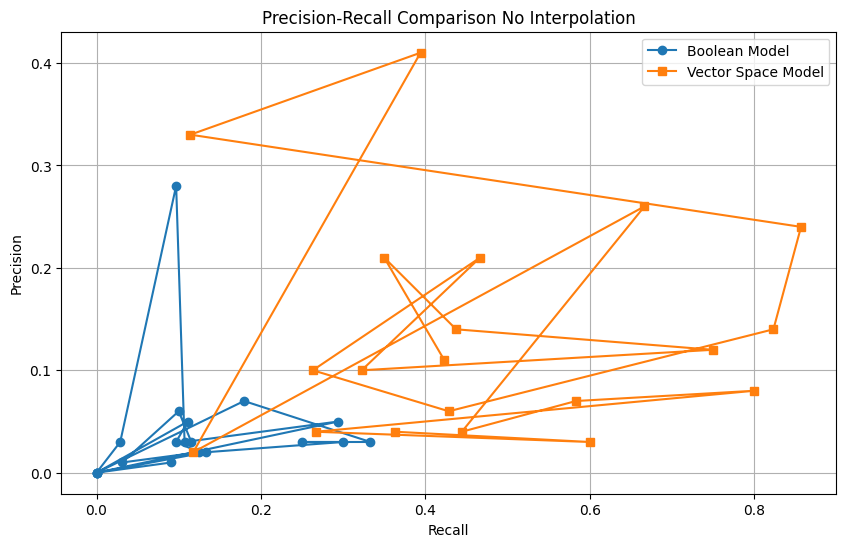

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(bool_recalls, bool_precisions, marker='o', linestyle='-', label='Boolean Model')

plt.plot(vsm_recalls, vsm_precisions, marker='s', linestyle='-', label='Vector Space Model')

plt.title('Precision-Recall Comparison No Interpolation')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

- Precision-Recall Curve with Interpolation

Plotting the Precision - Recall Curve it is obvious that the data points do not form a smooth curve. A common cause for this issue would be the use of a discrete set of documents that are retrieved in a specific order. To fix this, interpolation smooths the curve by creating standard recall levels. Alignment of the recall values for both models is achieved, enabling a side-by-side comparison of their precision at the same recall levels.

In [9]:
def interpolate_pr_curve(recalls, precisions):

    recall_points = np.linspace(0, 1, 11)  # 0.0, 0.1, ..., 1.0
    interpolated_precisions = []

    for rp in recall_points:
        precision_at_rp = max((p for r, p in zip(recalls, precisions) if r >= rp), default=0)
        interpolated_precisions.append(precision_at_rp)

    return recall_points, interpolated_precisions

bool_interpolated_recall, bool_interpolated_precision = interpolate_pr_curve(bool_recalls, bool_precisions)
vsm_interpolated_recall, vsm_interpolated_precision = interpolate_pr_curve(vsm_recalls, vsm_precisions)


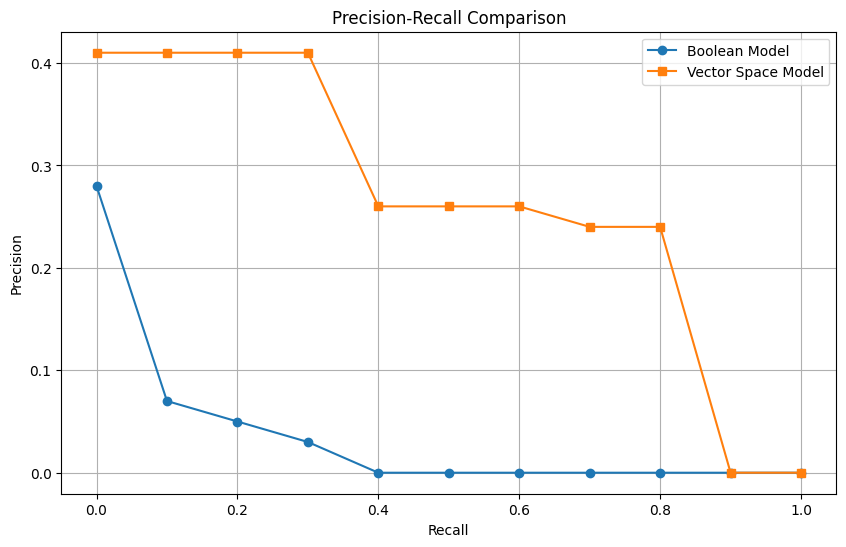

In [10]:
# Plot
plt.figure(figsize=(10, 6))

# Boolean Model PR Curve
plt.plot(bool_interpolated_recall, bool_interpolated_precision, marker='o', linestyle='-', label='Boolean Model')

# VSM PR Curve
plt.plot(vsm_interpolated_recall, vsm_interpolated_precision, marker='s', linestyle='-', label='Vector Space Model')

plt.title('Precision-Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

